In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data adapted from https://github.com/rhubb/SISG2020

- ID: Subject ID

- sex: Sex: 0 = male, 1 = female

- age: Age in years

- chol: Serum total cholesterol, mg/dl

- BMI: Body-mass index, kg/m2

- TG: Serum triglycerides, mg/dl

- APOE: Apolipoprotein E genotype, with six genotypes coded 1-6: 1 = e2/e2, 2 = e2/e3, 3 = e2/e4, 4 = e3/e3, 5 = e3/e4, 6 = e4/e4

- rs174548: Candidate SNP 1 genotype, chromosome 11, physical position 61,327,924. Coded as the number of minor alleles: 0 = C/C, 1 = C/G, 2 = G/G.

- rs4775401: Candidate SNP 2 genotype, chromosome 15, physical position 59,476,915. Coded as the number of minor alleles: 0 = C/C, 1 = C/T, 2 = T/T.

- HTN: diagnosed hypertension: 0 = no, 1 = yes

- chd: diagnosis of coronary heart disease: 0 = no, 1 = yes

In [2]:
#import cholestrol_data_cleaned data
df = pd.read_csv('../data/cholesterol_data.csv')

In [3]:
df.shape

(400, 11)

In [4]:
df.head()

,ID,sex,age,chol,BMI,TG,APOE,rs174548,rs4775401,HTN,chd
0,1,1.0,74.0,215.0,26.2,367,4,1,2,1,1
1,2,1.0,51.0,204.0,24.7,150,4,2,1,1,1
2,3,0.0,64.0,205.0,24.2,213,4,0,1,1,0
3,4,0.0,34.0,182.0,23.8,111,2,1,1,1,0
4,5,1.0,52.0,175.0,34.1,328,2,0,0,1,0


In [5]:
#convert column names to lowercase
df.columns = df.columns.str.lower()

In [6]:
df.head()

,id,sex,age,chol,bmi,tg,apoe,rs174548,rs4775401,htn,chd
0,1,1.0,74.0,215.0,26.2,367,4,1,2,1,1
1,2,1.0,51.0,204.0,24.7,150,4,2,1,1,1
2,3,0.0,64.0,205.0,24.2,213,4,0,1,1,0
3,4,0.0,34.0,182.0,23.8,111,2,1,1,1,0
4,5,1.0,52.0,175.0,34.1,328,2,0,0,1,0


In [7]:
df.describe()

,id,sex,age,chol,bmi,tg,apoe,rs174548,rs4775401,htn,chd
count,400.000000,392.000000,392.000000,392.000000,392.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,0.507653,54.854592,183.681122,25.021173,177.440000,3.930000,0.497500,0.565000,0.787500,0.317500
std,115.614301,0.500580,14.386402,22.052317,3.014413,82.983233,0.909488,0.617208,0.621886,0.409589,0.466087
min,1.000000,0.000000,30.000000,117.000000,19.400000,47.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,100.750000,0.000000,43.000000,168.000000,22.900000,114.750000,4.000000,0.000000,0.000000,1.000000,0.000000
50%,200.500000,1.000000,55.000000,183.500000,24.600000,156.500000,4.000000,0.000000,0.000000,1.000000,0.000000
75%,300.250000,1.000000,67.000000,199.000000,26.725000,234.000000,4.000000,1.000000,1.000000,1.000000,1.000000
max,400.000000,1.000000,80.000000,247.000000,38.800000,586.000000,6.000000,2.000000,2.000000,1.000000,1.000000


In [8]:
df.dropna(inplace=True)

In [9]:
df.describe()

,id,sex,age,chol,bmi,tg,apoe,rs174548,rs4775401,htn,chd
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,202.845109,0.502717,55.288043,183.831522,25.078261,179.758152,3.923913,0.502717,0.573370,0.782609,0.328804
std,114.776814,0.500673,14.463283,22.189520,3.045337,83.271420,0.915905,0.617628,0.626436,0.413033,0.470418
min,1.000000,0.000000,30.000000,117.000000,19.400000,47.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,105.750000,0.000000,43.000000,168.000000,22.975000,115.000000,4.000000,0.000000,0.000000,1.000000,0.000000
50%,204.500000,1.000000,56.000000,184.000000,24.700000,159.000000,4.000000,0.000000,0.500000,1.000000,0.000000
75%,301.250000,1.000000,68.000000,199.250000,26.900000,238.250000,4.000000,1.000000,1.000000,1.000000,1.000000
max,400.000000,1.000000,80.000000,247.000000,38.800000,586.000000,6.000000,2.000000,2.000000,1.000000,1.000000


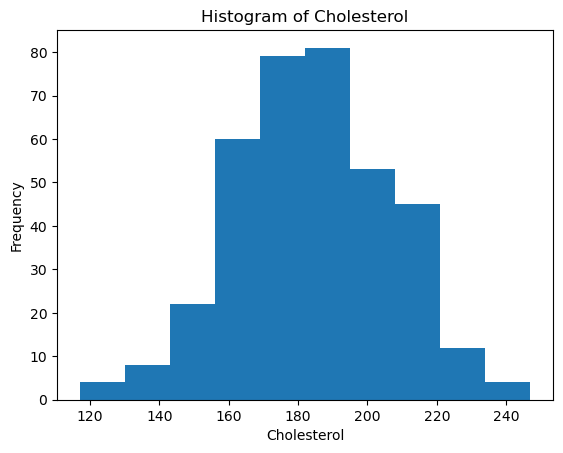

In [10]:
#histogram of chol column using matplotlib
plt.hist(df.chol)
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Histogram of Cholesterol')
plt.show()


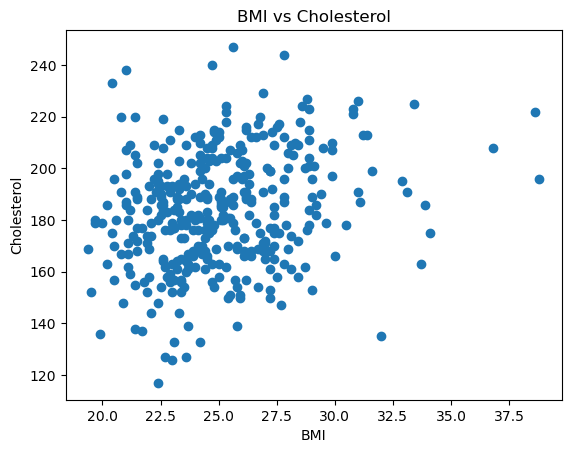

In [11]:
#scatterplot of bmi vs chd using matplotlib
plt.scatter(df.bmi, df.chol)
plt.xlabel('BMI')
plt.ylabel('Cholesterol')
plt.title('BMI vs Cholesterol')
plt.show()


In [12]:
#create indicator variable for bmi > 25
df['bmi_over_25'] = np.where(df.bmi > 25, 1, 0)

In [13]:
#create a frequency table of bmi_over_25

In [14]:
df.columns

Index(['id', 'sex', 'age', 'chol', 'bmi', 'tg', 'apoe', 'rs174548',
       'rs4775401', 'htn', 'chd', 'bmi_over_25'],
      dtype='object')

In [15]:
#mean of 'tg' and count of patients by 'bmi_over_25'
summary_tg_by_bmi_cat = df.groupby('bmi_over_25').agg({'tg': np.mean, 'bmi_over_25': np.size})
#rename columns
summary_tg_by_bmi_cat.columns = ['mean_tg', 'n_patients']
#add column for percent of patients
summary_tg_by_bmi_cat['percent_patients'] = summary_tg_by_bmi_cat.n_patients / summary_tg_by_bmi_cat.n_patients.sum()
summary_tg_by_bmi_cat

,mean_tg,n_patients,percent_patients
bmi_over_25,,,
0,149.712871,202,0.548913
1,216.319277,166,0.451087


Text(0.5, 1.0, 'Mean TG by BMI > 25')

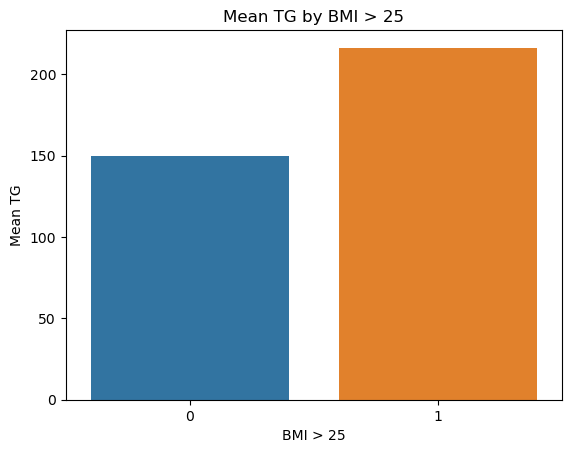

In [16]:
#barplot of mean tg by bmi_over_25 using seaborn
sns.barplot(x='bmi_over_25', y='mean_tg', data=summary_tg_by_bmi_cat.reset_index())
plt.xlabel('BMI > 25')
plt.ylabel('Mean TG')
plt.title('Mean TG by BMI > 25')

In [17]:
#mean and sd of 'tg' and count of patients by 'bmi_over_25'
summary_tg_by_bmi_cat = df.groupby('bmi_over_25').agg({'tg': {np.mean, np.std}, 'bmi_over_25': np.size})

#rename columns
summary_tg_by_bmi_cat.columns = ['mean_tg', 'sd_tg', 'n_patients']
#add column for percent of patients
summary_tg_by_bmi_cat['percent_patients'] = summary_tg_by_bmi_cat.n_patients / summary_tg_by_bmi_cat.n_patients.sum()
summary_tg_by_bmi_cat

,mean_tg,sd_tg,n_patients,percent_patients
bmi_over_25,,,,
0,63.308899,149.712871,202,0.548913
1,89.948473,216.319277,166,0.451087


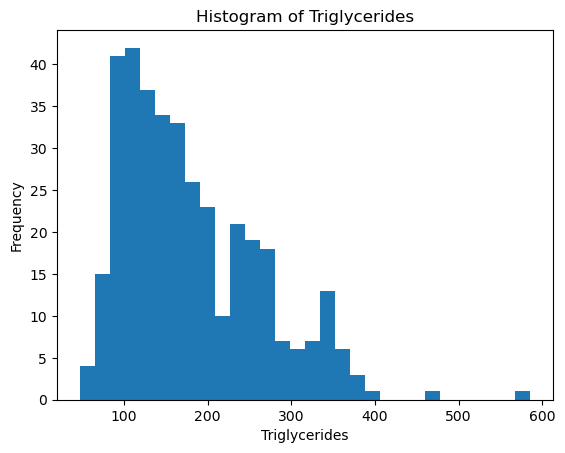

In [18]:
#plot histogram of 'tg' using matplotlib
fig, ax = plt.subplots()
ax.hist(df.tg, bins=30)
plt.xlabel('Triglycerides')
plt.ylabel('Frequency')
plt.title('Histogram of Triglycerides')
plt.show()

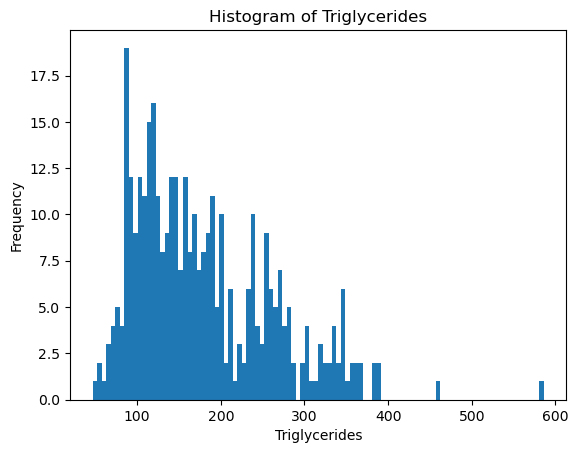

In [19]:
#change bin size of hist
#plot histogram of 'tg' using matplotlib
fig, ax = plt.subplots()
ax.hist(df.tg, bins=100)
plt.xlabel('Triglycerides')
plt.ylabel('Frequency')
plt.title('Histogram of Triglycerides')
plt.show()

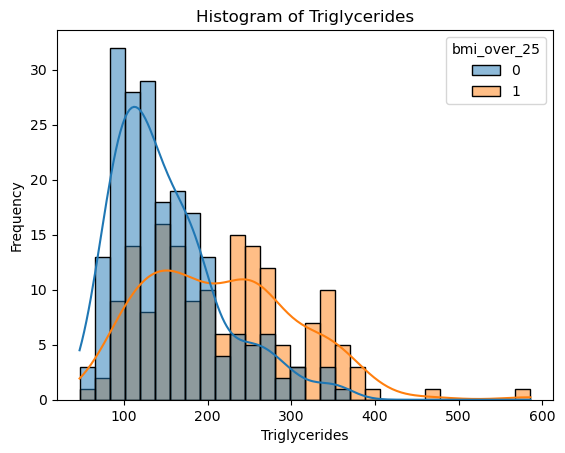

In [20]:
#histogram of 'tg' by 'bmi_over_25' using matplotlib
fig, ax = plt.subplots()
sns.histplot(data=df, x='tg', hue='bmi_over_25', bins=30, ax=ax, kde=True)
plt.xlabel('Triglycerides')
plt.ylabel('Frequency')
plt.title('Histogram of Triglycerides')
plt.show()


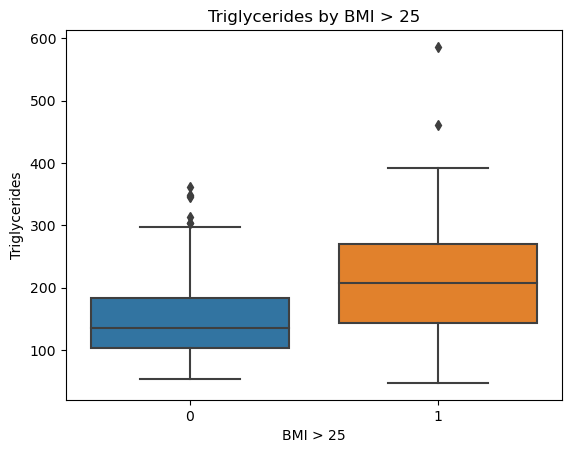

In [21]:
#boxplot of 'tg' by 'bmi_over_25' using seaborn
fig, ax = plt.subplots()
sns.boxplot(data=df, x='bmi_over_25', y='tg', ax=ax)
plt.xlabel('BMI > 25')
plt.ylabel('Triglycerides')
plt.title('Triglycerides by BMI > 25')
plt.show()



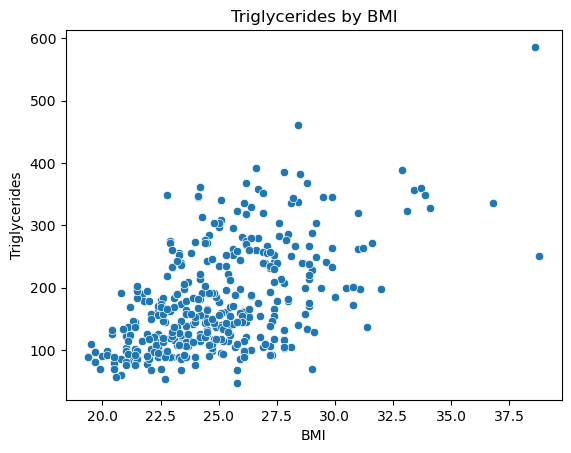

In [22]:
#scatter plot of 'tg' vs 'bmi' using seaborn
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='bmi', y='tg', ax=ax)
plt.xlabel('BMI')
plt.ylabel('Triglycerides')
plt.title('Triglycerides by BMI')
plt.show()


In [23]:
#Use linear regression to investigate the association between triglycerides and BMI
import statsmodels.api as sm
#add constant to model
X = sm.add_constant(df.bmi)
#fit model
model = sm.OLS(df.tg, X).fit()
#view model summary
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     tg   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     161.6
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           6.39e-31
Time:                        01:38:41   Log-Likelihood:                -2081.7
No. Observations:                 368   AIC:                             4167.
Df Residuals:                     366   BIC:                             4175.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -199.7777     30.072     -6.643      0.000    -258.914    -140.642
bmi           15.1341      1.190     12.713      0.000      12.793      17.475
==============================================================================
Omnibus:                       23.026   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.575
Skew:                           0.631   Prob(JB):                     2.80e-06
Kurtosis:                       3.273   Cond. No.                         210.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

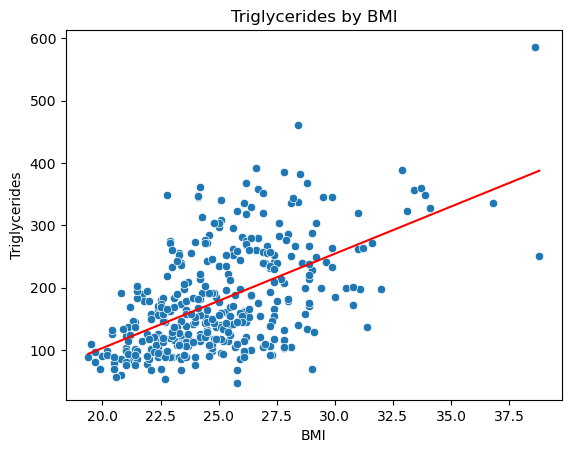

In [24]:
#plot a scatterplot of 'tg' vs 'bmi' using seaborn and overlay the regression line
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='bmi', y='tg', ax=ax)
#add regression line
sns.lineplot(x=df.bmi, y=model.predict(X), color='red', ax=ax)
plt.xlabel('BMI')
plt.ylabel('Triglycerides')
plt.title('Triglycerides by BMI')
plt.show()


In [25]:
#confidence and prediction interval for a new observation with bmi value of 25
#95% prediction interval
model.get_prediction([1, 25]).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,178.573748,3.621469,171.452249,185.695246,41.819383,315.328113


In [26]:
#the rsquared value
model.rsquared

0.30632994721099427

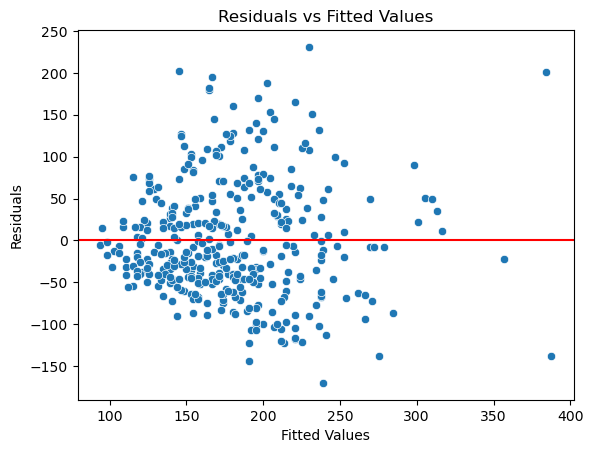

In [27]:
#plot fitted values vs residuals, with a horizontal line at 0
fig, ax = plt.subplots()
sns.scatterplot(x=model.fittedvalues, y=model.resid, ax=ax)
ax.axhline(0, color='red')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


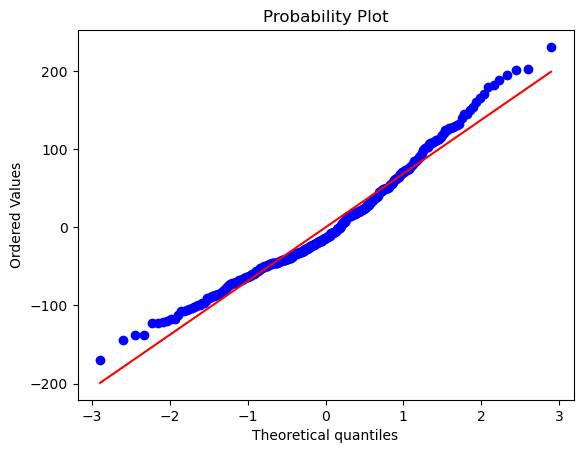

In [28]:
# qqplot of residuals
import scipy.stats as stats
fig, ax = plt.subplots()
stats.probplot(model.resid, plot=ax)
plt.show()


ANOVA

In [29]:
#Conduct an analysis of differences in mean cholesterol levels across genotype groups defined by rs4775401
# avg chol amount by rs4775401
df.groupby('rs4775401').agg({'chol': np.mean})
 


,chol
rs4775401,
0,183.369565
1,184.203822
2,184.814815


In [30]:
#sex as categorical variable where 1 is female and 0 is male
df['sex_categorical'] = np.where(df['sex'] == 1.0, 'female', 'male')

In [31]:
#anova for chol by rs4775401
import statsmodels.formula.api as smf
model2 = smf.ols('chol ~ rs4775401 + C(sex_categorical)', data=df).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   chol   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     12.66
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           4.84e-06
Time:                        01:38:44   Log-Likelihood:                -1650.0
No. Observations:                 368   AIC:                             3306.
Df Residuals:                     365   BIC:                             3318.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    188.6732      1.851    101.926      0.000     185.033     192.313
C(sex_categorical)[T.male]   -11.2673      2.248     -5.013      0.000     -15.687      -6.848
rs4775401                      1.3279      1.796      0.739      0.460      -2.205       4.860
==============================================================================
Omnibus:                        0.120   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.942   Jarque-Bera (JB):                0.233
Skew:                          -0.011   Prob(JB):                        0.890
Kurtosis:                       2.879   Cond. No.                         3.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#anova table
sm.stats.anova_lm(model2)

,df,sum_sq,mean_sq,F,PR(>F)
C(sex_categorical),1.0,11468.546166,11468.546166,24.772276,9.963293e-07
rs4775401,1.0,253.002635,253.002635,0.546490,4.602304e-01
Residual,365.0,168980.005547,462.958919,NaN,NaN


In [33]:
#One-way ANOVA (not assuming equal variances)
oneway_ova = stats.f_oneway(df.chol[df.rs4775401 == 0],
               df.chol[df.rs4775401 == 1],
               df.chol[df.rs4775401 == 2])
#print results
print('One-way ANOVA results:')
print('F-statistic:', oneway_ova[0])
print('p-value:', oneway_ova[1])



One-way ANOVA results:
F-statistic: 0.08804265274264583
p-value: 0.915741258990906
